## 3) Ternary Conditional Operator

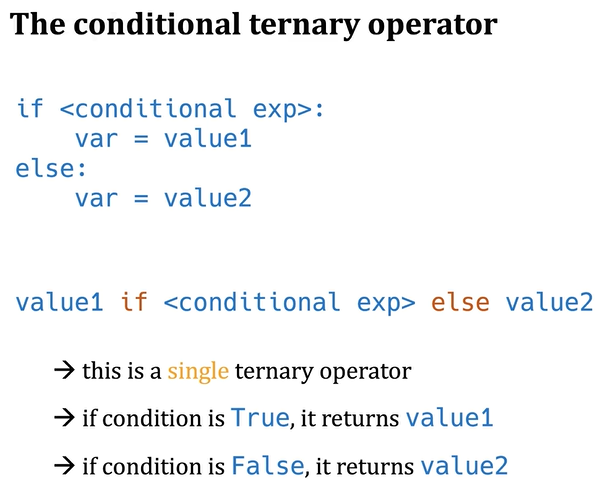

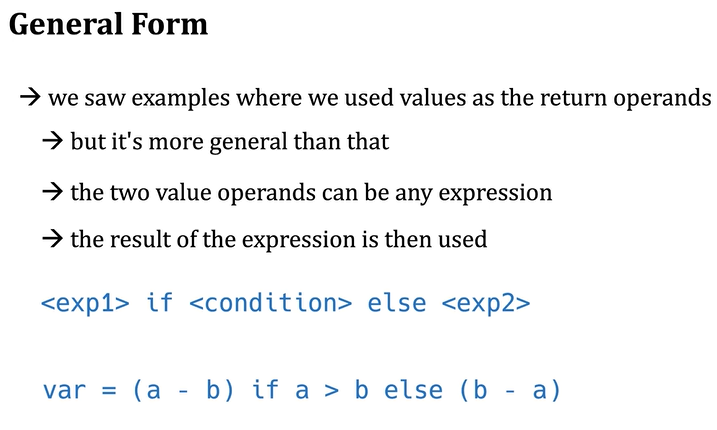



As explained in the lecture, this operator takes three operands.

* the condition to evaluate
* the expression to evaluate and return if condition is `True`
* the expression to evaluate and return if condition is `False`

That operator is structured in such a way that it makes reading the code very intuitive.

**SoapBox Moment**: By the way, notice how I keep talking about code readability? 
That's really really important, and I will keep emphasizing this throughout this course.

When you start writing a chunk of code, your first focus should be on correctness (no bugs) and readability. Maybe the code could be written more concisely, but sacrificing readability, or maybe it could be written more efficiently, but again at the cost of readability. It could... But don't fall into that trap - write your code for clarity and correctness **first**. Then later, once its working and you determine that that piece of code is a bottleneck to your overall program, then, and only then, go back and optimize it.

And readability is not for the benefit of the Python compiler - it's for us, humans, who have to read the code!

That's it, off my soapbox. For now at least :-)

Let's see how the ternary conditional operator works.

Suppose we want to calculate the volume of a bid, based on the ask price of some security.

We could do it this way:

In [ ]:
ask_price = 100

if ask_price > 50:
    volume = 50
else:
    volume = 80
    
print(volume)

50


But we can simplify this, without losing readability, as follows:

In [ ]:
ask_price = 100

volume = 50 if ask_price > 50 else 80

print(volume)

50


Of course, the "return value" can be any expression, not just a literal value:

Let's say we want to find the "distance" between two numbers, but we forgot about the `abs()` function.

We could do it this way:

In [ ]:
a = 10
b = 20

distance = a - b if a >= b else b-a

print(distance)

10


In [ ]:
a = 20
b = 10

distance = a - b if a >= b else b-a

print(distance)

10


This ternary operator can also be very useful to deall with "null" values.

Often when we process data, we might have some missing data that we want to replace with either a default value or some calculated value (maybe from the previous row, or the average of all the previous rows, etc).

Suppose we are looping (iterating) through some data file and for every row we process we have the following data:

- `current_value` - the value of some column in our current row. A value of `-999` indicates the value is missing.
- `running_total` - running total of that column's values so far, possibly zero
- `running_count` - running count of number of rows (not including current one)

So, at some point in time we may have this data:

In [ ]:
current_value = 100
running_total = 15000
running_count = 125

We then calculate the `cleaned_value` this way before we update `running_total` (and updating `running_count` would be done similarly):

In [ ]:
cleaned_value = 0 if current_value == -999 else current_value
running_total = running_total + cleaned_value

print(running_total)

15100


As you can see, our value was not missing, so we used it as is.

On the other hand, if the value was missing, we might have data like this:

In [ ]:
current_value = -999
running_total = 15000
running_count = 125

And the same code as before would yield:

In [ ]:
cleaned_value = 0 if current_value == -999 else current_value
running_total = running_total + cleaned_value

print(running_total)

15000


If we wanted to avoid that `cleaned_value` temporary variable, we could re-write our code this way:

In [ ]:
running_total = running_total + (0 if current_value == -999 else current_value)
print(running_total)

15000


Be careful here! the ternary conditional operator has **lower** precedence than `+`, so we **need** to use parentheses to make our code behave the way we want (first calculate the cleaned up value, and then add it to the running total)

Keep the ternary operator in your backpocket for **simple** use cases. If it starts to get convoluted, use a regular `if...elif...else` statement!